In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [6]:
df= pd.read_csv("../../data/custom_features2.csv")

## Agglomertive with custom features

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

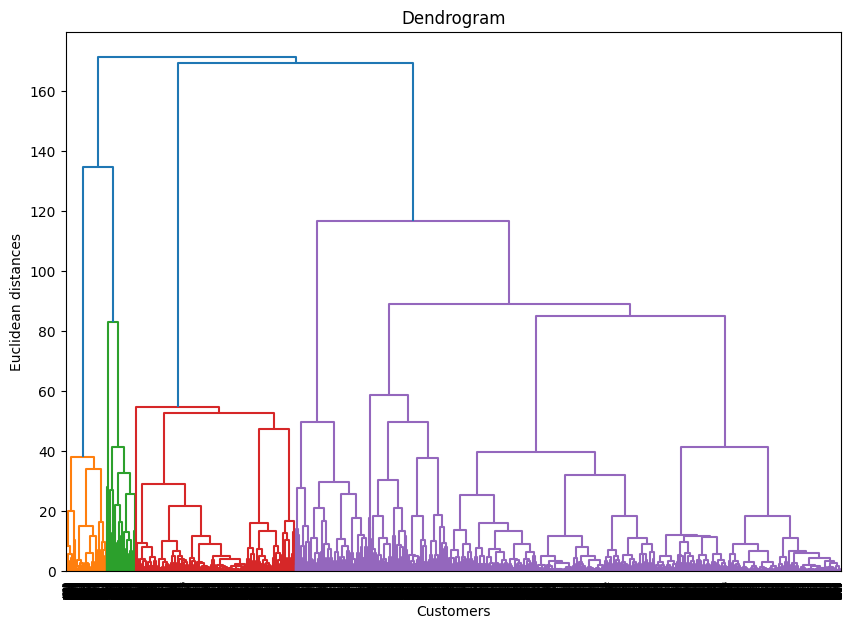

In [17]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Fit hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=4)
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Cluster'] = hc.fit_predict(df_scaled.values)

# Plot the dendrogram to see the hierarchical structure
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

# Prepare data
X = df_scaled.drop(columns='Cluster')  # Features
y = df_scaled['Cluster']  # Cluster labels

# Calculate scores
silhouette_avg = silhouette_score(X, y)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.356


In [25]:
df_og = pd.read_csv("../../data/dataset_cleaned.csv")
df_og["Cluster"] = df_scaled["Cluster"]
df_og["Cluster"].value_counts()

Cluster
0    6297
1    1839
3     477
2     337
Name: count, dtype: int64

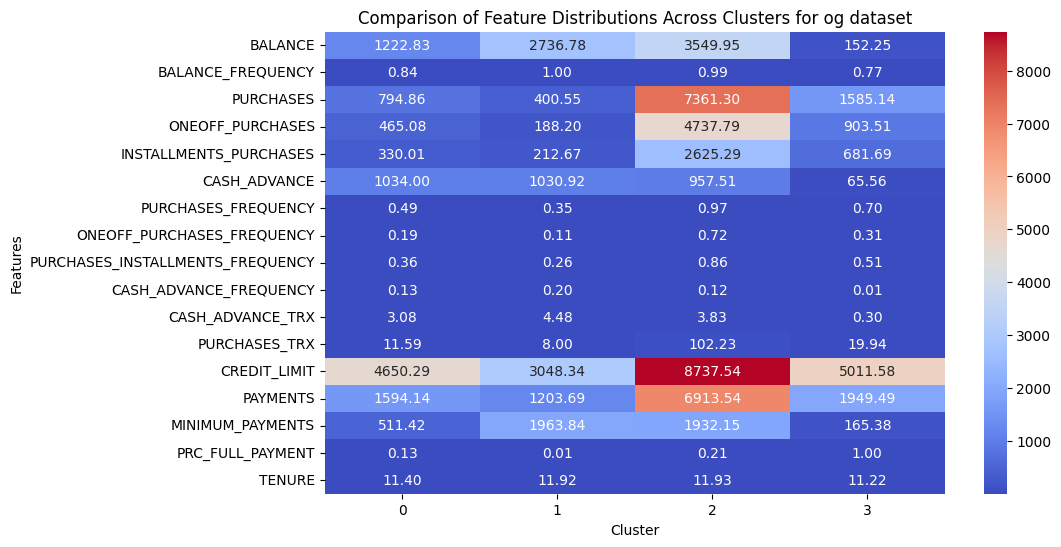

In [26]:
df_clustered_means = df_og.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered_means.T, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Comparison of Feature Distributions Across Clusters for og dataset')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


## Agglomerative with PCA

In [13]:
df2= pd.read_csv("../../data/dataset_cleaned.csv")

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df2_pca = pca.fit_transform(df2_scaled)

df2_pca = pd.DataFrame(df2_pca, columns=['PCA1', 'PCA2', 'PCA3'])

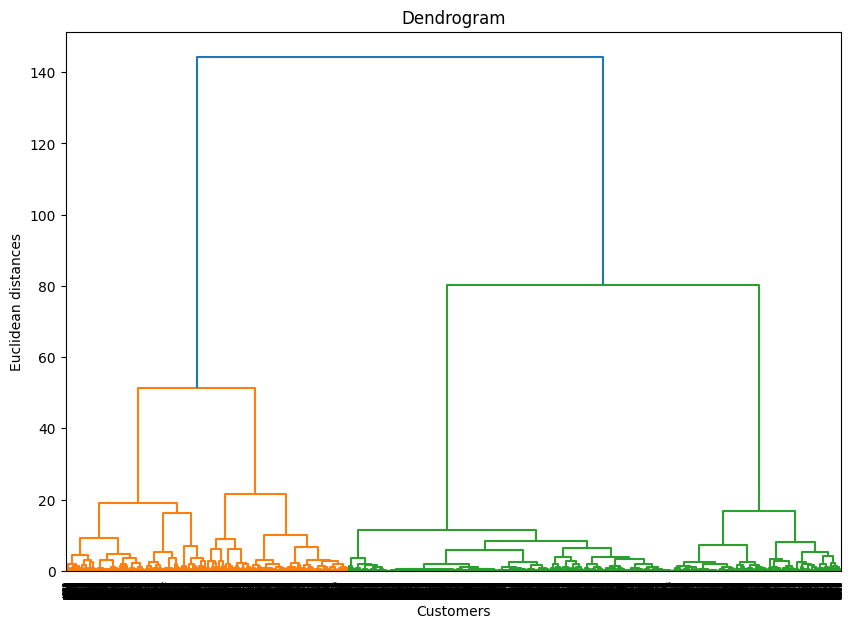

In [22]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Fit hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=4)
df2_pca = pd.DataFrame(df2_pca)
df2_pca['Cluster'] = hc.fit_predict(df2_pca.values)

# Plot the dendrogram to see the hierarchical structure
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df2_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

# Prepare data
X = df2_pca.drop(columns='Cluster')  # Features
y = df2_pca['Cluster']  # Cluster labels

# Calculate scores
silhouette_avg = silhouette_score(X, y)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.395


In [27]:
df2["Cluster"] = df2_pca["Cluster"]
df2["Cluster"].value_counts()

Cluster
3    3751
2    1930
0    1644
1    1625
Name: count, dtype: int64

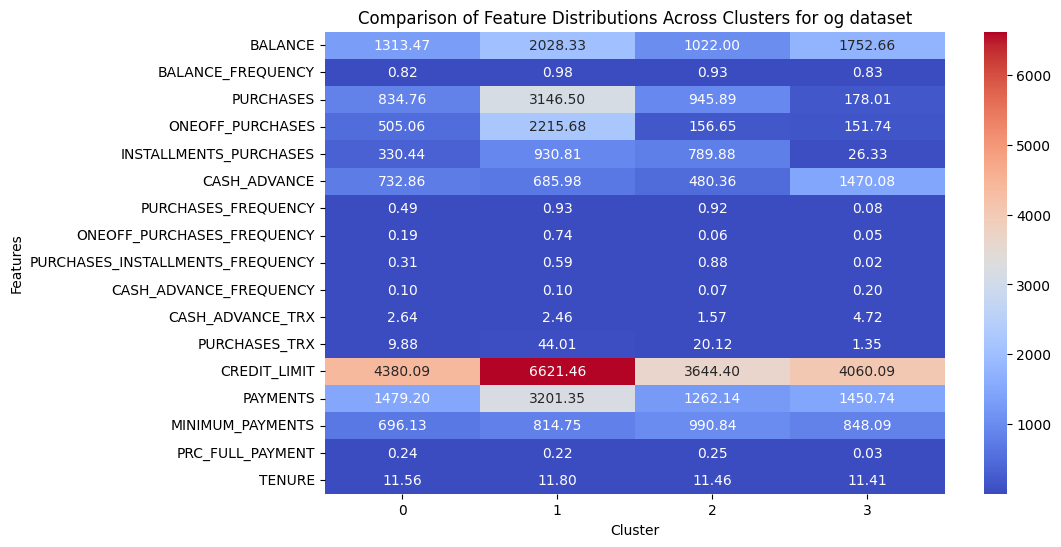

In [28]:
df_clustered_means = df2.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered_means.T, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Comparison of Feature Distributions Across Clusters for og dataset')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()
